In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn import preprocessing as pre
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def dataset():
    data = pd.read_csv('final-dataset.csv')
    X = data.drop(columns=['Signal','Label','Hurst Component'])
    y = data['Label']
    feature_names = X.columns
    return X, y, feature_names

In [3]:
def get_feature_names(selector, feature_names):
    mask = selector.get_support() #list of booleans
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
    return new_features

In [4]:
parameters = {'n_neighbors':range(2,25), 'weights':('uniform', 'distance'), 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}

In [5]:
def feature_scaling_min_max(X):
    min_max_scaler = pre.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    return X

In [6]:
def feature_scaling_basic(X):
    return pre.scale(X)

In [7]:
from sklearn.metrics import confusion_matrix
def performance_measures(x_test, y_test):
    y_true = y_test
    y_pred = clf.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    return sensitivity, specificity

In [8]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0
best_sensitivity = 0
best_specificity = 0
selected_names = []

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    names = get_feature_names(selector, feature_names)
    sensitivity, specificity = performance_measures(x_test, y_test)
    score = clf.score(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("passed ", k, " steps")

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)
print("names are ", selected_names)

passed  2  steps
passed  3  steps
passed  4  steps
passed  5  steps
passed  6  steps
passed  7  steps
passed  8  steps
passed  9  steps
Test Score is  0.7
Best params are  {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
Best k is  9
Val score is  0.6952380952380952
Sensitivity  0.75
Specificity  0.6509433962264151
names are  ['Zero Crossings', 'Frequency (Hz)', 'Delta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Hjorth Mobility', 'Spectral Entropy']


In [11]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    names = get_feature_names(selector, feature_names)
    sensitivity, specificity = performance_measures(x_test, y_test)
    score = clf.score(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("passed ", k, " steps")

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)
print("names are ", selected_names)

passed  2  steps
passed  3  steps
passed  4  steps
passed  5  steps
passed  6  steps
passed  7  steps
passed  8  steps
passed  9  steps
Test Score is  0.7
Best params are  {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
Best k is  8
Val score is  0.6952380952380952
Sensitivity  0.75
Specificity  0.6509433962264151
names are  ['Zero Crossings', 'Frequency (Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Hjorth Mobility', 'Spectral Entropy']


In [10]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0
selected_names = []
selected_scores = []

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(mutual_info_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    score = clf.score(x_test, y_test)
    names = get_feature_names(selector, feature_names)
    sensitivity, specificity = performance_measures(x_test, y_test)
    scores = selector.scores_[selector.get_support()]
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_scores = scores
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("passed ", k, " steps")

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)
print("names are ", selected_names)
print("Scores are ", selected_scores)

passed  2  steps
passed  3  steps
passed  4  steps
passed  5  steps
passed  6  steps
passed  7  steps
passed  8  steps
passed  9  steps
Test Score is  0.9095238095238095
Best params are  {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}
Best k is  5
Val score is  0.9523809523809523
Sensitivity  0.7115384615384616
Specificity  0.6226415094339622
names are  ['Theta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Variance']
Scores are  [0.07036502 0.05676415 0.11735896 0.13209838 0.11326418]


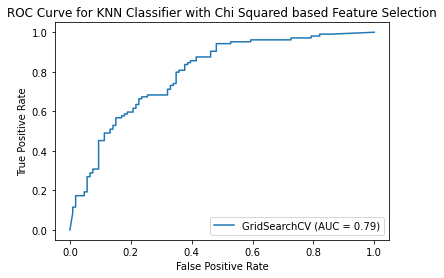

In [13]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(chi2, k=9)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for KNN Classifier with Chi Squared based Feature Selection")
plt.show()  

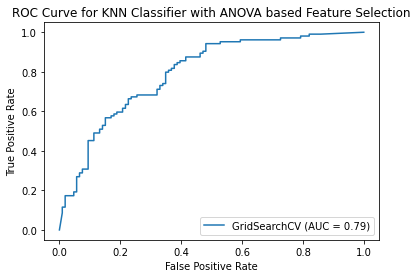

In [11]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(f_classif, k=8)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for KNN Classifier with ANOVA based Feature Selection")
plt.show()  

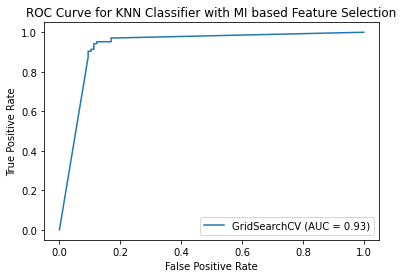

In [12]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for KNN Classifier with MI based Feature Selection")
plt.show()  